In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Ερώτημα 1

In [9]:
df = pd.read_csv('diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


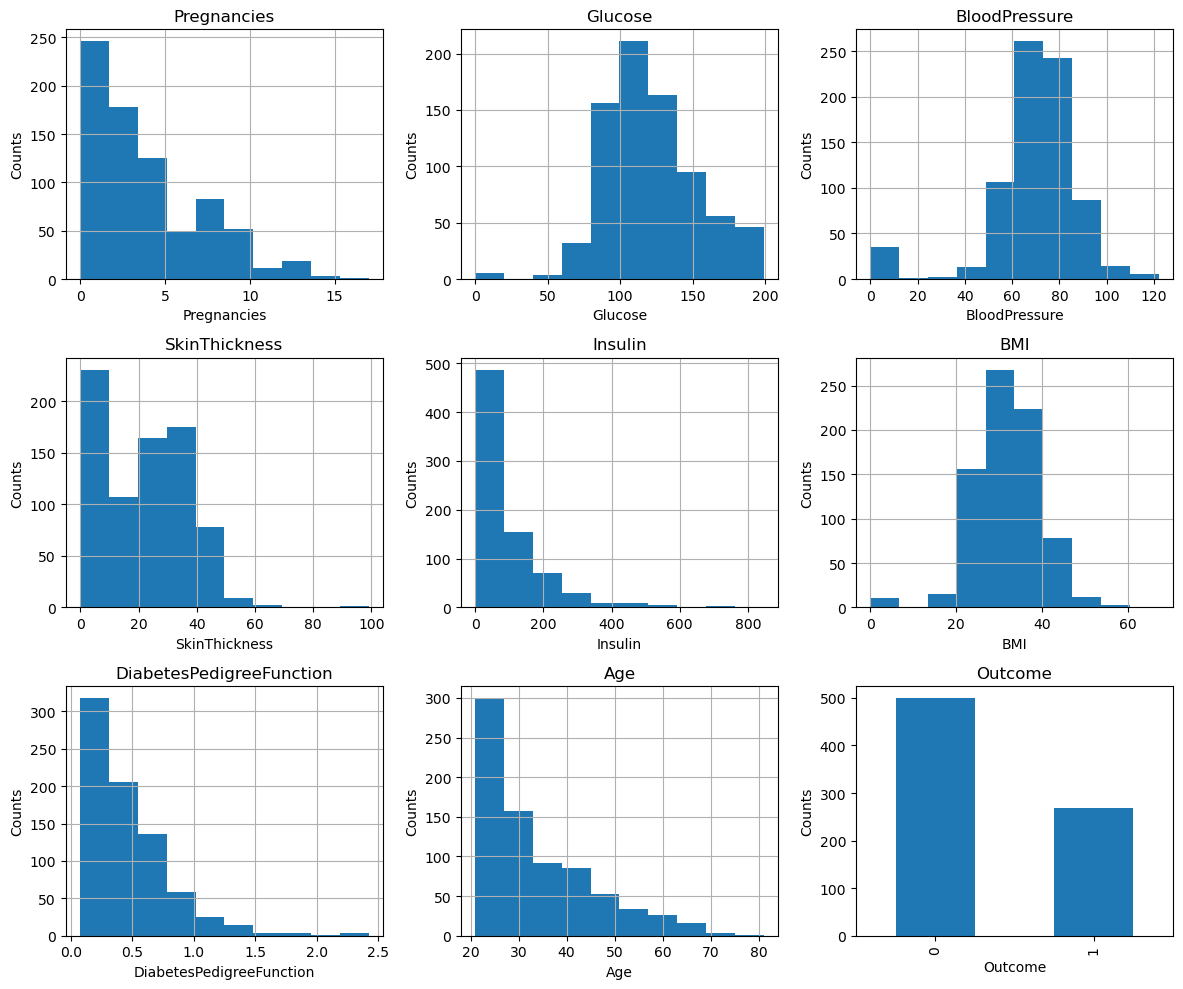

In [75]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

for col in df.columns:
    axis_indexes = np.unravel_index(df.columns.get_loc(col), axs.shape) # subplot index
    axs[axis_indexes].set_title(col)
    axs[axis_indexes].set_xlabel(col)
    axs[axis_indexes].set_ylabel('Counts')
    if col == 'Outcome':
        df[col].value_counts().plot(kind='bar', ax=axs[axis_indexes])
        continue
    df[col].hist(ax=axs[axis_indexes])

# y axis is counts for all plots
plt.tight_layout()
plt.show()


# Ερώτημα 2

Για κάποια χαρακτηριστικά δεν εχουν νοημα οι τιμές μηδεν όπως πίεση (BloodPressure) και δείκτης μάζας σώματος (BMI).

In [38]:
total = df.shape[0]
zero_bloodpressure_percentage = df['BloodPressure'].eq(0).sum()/total*100
zero_bmi_percentage = df['BMI'].eq(0).sum()/total*100
print("Percentage of zero blood pressure values: ", zero_bloodpressure_percentage, "%")
print("Percentage of zero BMI values: ", zero_bmi_percentage, "%")

Percentage of zero blood pressure values:  4.557291666666666 %
Percentage of zero BMI values:  1.4322916666666665 %


Επίσης φαινεται οτι το outcome στα αποτελεσματα εχει αρκετά περισσοτερα αρνητικα αποτελεσματα απο οτι θετικα, ενώ μας ενδιαφέρει περισσότερο να έχουμε πολλά δεδομένα για θετικά αποτελέσματα (για να είναι το μοντελο πιο ακριβες στην περιπτωση που καποιος εχει διαβητη).

In [39]:
no_dib_percentage = df['Outcome'].eq(0).sum()/total*100
yes_dib_percentage = df['Outcome'].eq(1).sum()/total*100
print("Percentage of no diabetes cases: ", no_dib_percentage, "%")
print("Percentage of diabetes cases: ", yes_dib_percentage, "%")

Percentage of no diabetes cases:  65.10416666666666 %
Percentage of diabetes cases:  34.89583333333333 %


Οπότε θωρώ οτι η ποιότητα των δεδομένων δεν είναι καλή.

# Ερώτημα 3

Η μεταβλητή Age φαίνεται να ακολουθεί εκθετική κατανομή με το πλήθος των δεδομένων να μειώνεται όσο αυξάνεται η ηλικία.

In [48]:
between_21_30_percentage =df['Age'].between(21, 30).sum()/total*100
between_30_81_percentage = df['Age'].between(30, 81).sum()/total*100
print("Percentage of people between 21 and 30 years old: ", between_21_30_percentage, "%")
print("Percentage of people between 30 and 81 years old: ", between_30_81_percentage, "%")

Percentage of people between 21 and 30 years old:  54.296875 %
Percentage of people between 30 and 81 years old:  48.4375 %


Πάνω απο τα μισα δεδομένα αφορουν ηλικίες 21-30 ετών, ενώ το υπόλοιπο αφορά ηλικίες 30-81 ετών που ειναι μεγαλυτερο φάσμα ηλικιών.
Αυτή η κατανομή των δεδομένων δεν ειναι ιδανική για την εκπαίδευση ενός μοντέλου που θα πρέπει να προβλέπει τον διαβήτη σε όλες τις ηλικίες.

# Ερώτημα 4

In [63]:
df.groupby('Outcome')['Glucose'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,109.980000,26.141200,0.0,93.0,107.0,125.0,197.0
1,268.0,141.257463,31.939622,0.0,119.0,140.0,167.0,199.0


Η μέση τιμή και η διάμεσος της γλυκόζης για τους διαβητικούς είναι ~140 και για τους μη διαβητικούς είναι ~108.

Η διαφορά αυτή είναι σημαντική και δείχνει οτι το επίπεδο γλυκόζης συσχετιζεται με τον διαβήτη.

Παρακάτω οπτικοποιείται η διαφορά στις τιμές γλυκόζης μεταξύ διαβητικών και μη διαβητικών με ένα boxplot.

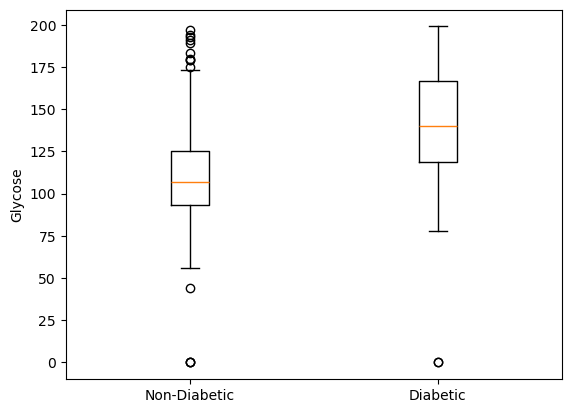

In [77]:
diabetic_glucose = df[df['Outcome'] == 1]['Glucose']
nondiabetic_glucose = df[df['Outcome'] == 0]['Glucose']

plt.boxplot([nondiabetic_glucose, diabetic_glucose],
            tick_labels=['Non-Diabetic', 'Diabetic'],
            )
plt.ylabel('Glycose')
plt.show()